# Fit $\rm KErSe_2$ CEF to a point charge model, and then fit the CEF coefficients directly

fitting charge locations

Allen Scheie, from Ovi Garlea's data

October 2019

In [23]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.ticker import MultipleLocator
import sys

cpal1 = plt.cm.Set1(np.arange(9))
import PyCrystalField as cef

In [2]:
############## Build point charge model to make initial estimate


Erpos = np.array([0.0, 0.0, 0.0])

zSe = 0.2649
Sepos = np.array([[0.66667,  0.33333, 1/3 - zSe],
                [-0.33333,  0.33333,  1/3 - zSe],
                [-0.33333, -0.66667,  1/3 - zSe],
                [-0.66667, -0.33333, -1/3 + zSe],
                [ 0.33333, -0.33333, -1/3 + zSe],
                [ 0.33333,  0.66667, -1/3 + zSe]])

ErLig = cef.Ligands(ion = 'Er3+',
    latticeParams=[4.1470,  4.1470, 22.7662,  90.0000,  90.0000, 120.0000],
    ionPos= Erpos, ligandPos=Sepos)

## Rotate so that y axis is along mirror plane
ErLig.rotateLigandsZ(oldaxis=ErLig.bonds[0])

Er3 = ErLig.PointChargeModel(printB = True, suppressminusm=True)
Er3.diagonalize()
Er3.printEigenvectors()
Er3.gsExpectation()

Er3.gtensor()

# Er3.printLaTexEigenvectors()

B_2 0  =  -0.04999204
B_2 1  =  -9.64e-06
B_2 2  =  -8.6e-06
B_4 0  =  -0.00024432
B_4 1  =  -0.0
B_4 2  =  -3e-08
B_4 3  =  0.00777162
B_4 4  =  1e-08
B_6 0  =  7.6e-07
B_6 1  =  0.0
B_6 2  =  0.0
B_6 3  =  3.15e-06
B_6 4  =  -0.0
B_6 5  =  -0.0
B_6 6  =  6.88e-06

 Eigenvalues 	 Eigenvectors
		-----------------------------------------------------------------------------------------------------------------------
0.00000 	|  [ 0.956 -0.     0.     0.272 -0.     0.     0.104 -0.     0.    -0.019
  0.    -0.     0.001 -0.     0.     0.001]  |
0.00000 	|  [ 0.001 -0.    -0.    -0.001 -0.    -0.    -0.019 -0.    -0.    -0.104
  0.     0.     0.272 -0.    -0.    -0.956]  |
3.62378 	|  [ 0.     0.464 -0.074  0.     0.294 -0.136  0.     0.178 -0.244  0.
 -0.099  0.404 -0.     0.054 -0.638 -0.   ]  |
3.62378 	|  [-0.     0.638  0.054  0.     0.404  0.099  0.     0.244  0.178 -0.
 -0.136 -0.294  0.     0.074  0.464 -0.   ]  |
6.10904 	|  [-0.     0.317 -0.174  0.    -0.002 -0.178  0.    -0.302 

array([[-2.40686000e-05,  0.00000000e+00,  7.97482000e-05],
       [ 0.00000000e+00,  2.29121541e-05,  0.00000000e+00],
       [ 1.67802428e-02,  0.00000000e+00,  1.44202739e+01]])

## Import and plot Neutron Spectrum

In [3]:
data1p6K = np.genfromtxt('KES_CEF_data/cuts_ei9mev_1p6K.txt', unpack=True)
data15K = np.genfromtxt('KES_CEF_data/cuts_ei9mev_15K.txt', unpack=True)
data100K = np.genfromtxt('KES_CEF_data/cuts_ei9mev_100K.txt', unpack=True)

alldata = [data1p6K,data15K,data100K]
datatemps = [1.8, 15, 100]

### Fit observed transitions to pull out eigenvalues

<IPython.core.display.Javascript object>


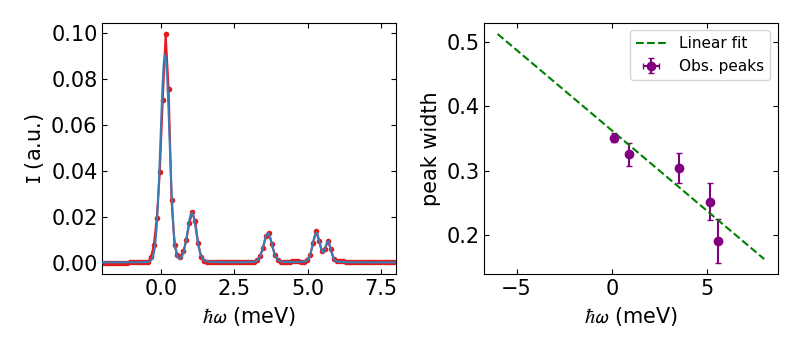

[0.13515156487106053, 0.9132071732842264, 3.504800645878369, 5.155917342976868, 5.560145541287389] [0.3512410705480638, 0.3253514112153624, 0.3043522834245795, 0.25200588513890115, 0.1910902208311937] 0.061315245063475
[-0.0249575   0.36262711]


In [4]:
## Pick out observed eigenvalues
from scipy.special import wofz


def gaus(x, a, x0, sig):
    return a/(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - x0)/sig, 2.)/2.)

def voigt(x, a, x0, alpha, gamma):
    """ Return the Voigt line shape at x with Lorentzian component FWHM gamma
    and Gaussian component FWHM alpha."""
    sigma = (0.5*alpha) / np.sqrt(2 * np.log(2))
    return a*np.real(wofz(((x-x0) + 1j*(0.5*gamma))/sigma/np.sqrt(2))) / sigma\
                                                        /np.sqrt(2*np.pi)

dx, dy, de = alldata[0][0], alldata[0][1], alldata[0][2]

def gausfitfun(x, a0,x0,w0, a1,x1,w1, a2,x2,w2, a3,x3,w3, a4,x4,w4):
    return gaus(x-x0, a0,0,w0) + gaus(x-x0, a1,x1,w1) + gaus(x-x0, a2,x2,w2) +\
            gaus(x-x0, a3,x3,w3) + gaus(x-x0, a4,x4,w4) + 0.00015

LW = 0.1
def voigtfitfun(x, a0,x0,w0, a1,x1,w1, a2,x2,w2, a3,x3,w3, a4,x4,w4, lw0, lw):
    return voigt(x-x0, a0,0,w0, lw0) + voigt(x-x0, a1,x1,w1, lw) + voigt(x-x0, a2,x2,w2, lw) +\
            voigt(x-x0, a3,x3,w3, lw) + voigt(x-x0, a4,x4,w4, lw) + 0.00015

p0 = [4e-2, 0.15,0.25, 9e-3,0.87,0.25, 5e-3,3.47,0.25, 5e-3,5.11,0.18, 4e-3,5.58,0.18, 0.1, 0.1]

poptinitial, pcovinitial = curve_fit(voigtfitfun, dx, dy, sigma=de, p0=p0)
uncinitial = np.sqrt(np.diag(pcovinitial))

f, ax = plt.subplots(1,2, figsize=(8,3.5))

ax[0].errorbar(dx,dy,de, marker='.')
xxx = np.linspace(-2,10,300)
# ax[0].plot(xxx, voigtfitfun(xxx, *p0), zorder=10)
ax[0].plot(xxx, voigtfitfun(xxx, *poptinitial), zorder=10)
ax[0].set_xlim(-2,8)
ax[0].set_xlabel('$\\hbar \\omega$ (meV)')
ax[0].set_ylabel('$\\rm I$ (a.u.)')

#### 
ObsEnergies, DOE = [poptinitial[3*i+1] for i in range(0,5)],  [uncinitial[3*i+1] for i in range(0,5)], 
ObsWidths, DOW = [poptinitial[3*i+2] for i in range(0,5)],    [uncinitial[3*i+2] for i in range(0,5)]
print(ObsEnergies, ObsWidths, poptinitial[-1])
fittedLW = poptinitial[-1]

ax[1].errorbar(ObsEnergies, ObsWidths, xerr = DOE, yerr = DOW, capsize=2, marker='o', 
               ls='none', color='purple', label='Obs. peaks')
def straightline(x,a,b):
    return a*x + b
# width_popt, width_pcov = curve_fit(straightline, ObsEnergies, ObsWidths, sigma=DOW, p0=[-0.008,0.16])
width_popt, width_pcov = curve_fit(straightline, ObsEnergies[1:], ObsWidths[1:],  p0=[-0.008,0.16])
xxx = np.linspace(-6,8,3)
ax[1].plot(xxx, straightline(xxx, *width_popt), color='green', ls='--', label='Linear fit')
ax[1].set_xlabel("$\\hbar \\omega$ (meV)")
ax[1].set_ylabel("peak width")
ax[1].legend(fontsize=11)

plt.tight_layout()

print(width_popt)

#### A note on the resolution functions
Inexplicably, the fit converges much better when I use my straight line fit to the peak widths as a resolution function than when I use Ovi's calculated resolution function. I don't know why this is, but the thing about fitting is that it doesn't matter how you get to the minimum as long as you got there.

<IPython.core.display.Javascript object>


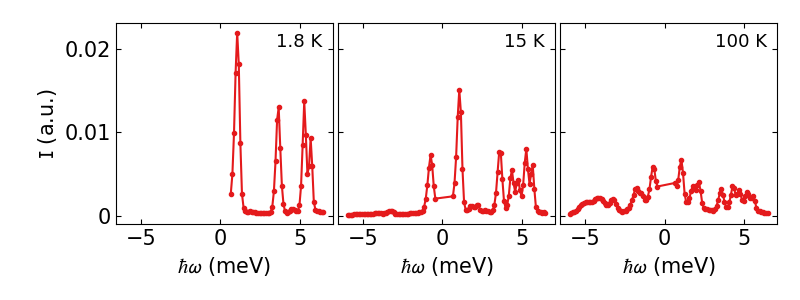

In [5]:
## Black out the elastic line, because it includes extra contributions from incoherent scattering, background, etc.
from copy import deepcopy

fitdata = deepcopy(alldata)

# fitdata[0][:,:100] *= np.nan
for i in range(len(fitdata)):
    fitdata[i] = np.hstack((fitdata[i][:,40:96], fitdata[i][:,106:-15]))
    
fitdata[0] = fitdata[0][:,56:]
    
f, ax = plt.subplots(1,3, figsize=(8,3), sharex=True, sharey=True)
for i,data in enumerate(fitdata):
    ax[i].errorbar(data[0], data[1], data[2], marker='.')
    ax[i].text(0.95,0.95, str(datatemps[i])+' K', transform=ax[i].transAxes,
              verticalalignment='top', horizontalalignment='right', fontsize=13)
    ax[i].set_xlabel('$\\hbar \\omega$ (meV)')
ax[0].set_ylabel('$\\rm I$ (a.u.)')
    
plt.tight_layout()
f.subplots_adjust(wspace=0.02)

## Define global Chi2

In [6]:
# Build Hamiltonian, ignoring the negative stevens operators (because they shouldn't be allowed by symmetry).
ion = 'Er3+'
ionJ = cef.Jion[ion][2]


######################

xoffset = ObsEnergies[0]+0.02
ObservedEnergies = [0]+ObsEnergies[1:]+[np.nan,np.nan, np.nan]

def err_global_PC(CFLevelsObject, zSe, distSe, gamma, pref):
    """Global error to all functions passed to it, used for fitting"""
    # define new Hamiltonian
    Sepos = np.array([[0.66667,  0.33333, 1./3 - zSe],
                    [-0.33333,  0.33333,  1./3 - zSe],
                    [-0.33333, -0.66667,  1./3 - zSe],
                    [-0.66667, -0.33333, -1./3 + zSe],
                    [ 0.33333, -0.33333, -1./3 + zSe],
                    [ 0.33333,  0.66667, -1./3 + zSe]])*distSe

    ErLig = cef.Ligands(ion = 'Er3+',
        latticeParams=[4.1470,  4.1470, 22.7662,  90.0000,  90.0000, 120.0000],
        ionPos= Erpos, ligandPos=Sepos)

    ## Rotate so that y axis is along mirror plane
    ErLig.rotateLigandsZ(oldaxis=ErLig.bonds[0])
    ErFit = ErLig.PointChargeModel(printB = False, suppressminusm=True)
    ErFit.diagonalize()

    # Compute error in eigenvalue
    try: erro=np.nansum((ErFit.eigenvalues.real - np.repeat(ObservedEnergies,2))**2)*5e5
    except TypeError:  erro = 0

    # Compute error in neutron spectrum
    for i,data in enumerate(fitdata):
        errspec = (pref* ErFit.normalizedNeutronSpectrum(Earray=data[0]*(1+datatemps[i]*1.9e-4)-xoffset,
                                                         Temp=datatemps[i],
                                    ResFunc= lambda de: straightline(de, *width_popt), gamma=gamma) )+ 0.0001 -\
                data[1]
        if i == 0:
            erro += np.nansum((errspec/data[2])**2)  # Chisq with uncertainty
            # Best fit was with multiplication by 3
        else:
            erro += np.nansum((errspec/data[2])**2)



    #return err0 + constraint
    sys.stdout.write("\r err = "+str(erro))
    sys.stdout.flush() # important for printing progress
    return erro

## Test function
err_global_PC(10, zSe=0.2649, distSe=1.0, gamma=fittedLW, pref=0.0010)

 err = 27763523.530035548

27763523.530035548

In [7]:
#************************************************************
# Fit to neutron data

##!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
##############################################################################################
FitCoefRes1 = Er3.fitdata(chisqfunc = err_global_PC,  fitargs = ['zSe', 'distSe','pref'], method = 'Nelder-Mead',
            zSe=0.2649, distSe=1.0, gamma=fittedLW, pref=0.00010)
##############################################################################################
##!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

 err = 885227.29623601422885227.2962360142
 err = 26401072.08178176726401072.081781767
Initial err = 26401072.081781767 	Final err = 885227.2962360142


In [8]:
print(FitCoefRes1['zSe'], FitCoefRes1['distSe'], FitCoefRes1['pref'])

[0.25434691] [0.98204048] [0.00014182]


In [9]:
Sepos = np.array([[0.66667,  0.33333, 1./3 - FitCoefRes1['zSe']],
                [-0.33333,  0.33333,  1./3 - FitCoefRes1['zSe']],
                [-0.33333, -0.66667,  1./3 - FitCoefRes1['zSe']],
                [-0.66667, -0.33333, -1./3 + FitCoefRes1['zSe']],
                [ 0.33333, -0.33333, -1./3 + FitCoefRes1['zSe']],
                [ 0.33333,  0.66667, -1./3 + FitCoefRes1['zSe']]])*FitCoefRes1['distSe']

ErLigFit = cef.Ligands(ion = 'Er3+',
    latticeParams=[4.1470,  4.1470, 22.7662,  90.0000,  90.0000, 120.0000],
    ionPos= Erpos, ligandPos=Sepos)

## Rotate so that y axis is along mirror plane
ErLigFit.rotateLigandsZ(oldaxis=ErLigFit.bonds[0])
ErCoefFit1 = ErLigFit.PointChargeModel(printB = True, suppressminusm=True)

ErCoefFit1.diagonalize()
ErCoefFit1.printEigenvectors()
ErCoefFit1.gsExpectation()

B_2 0  =  0.03489657
B_2 1  =  -7.34e-06
B_2 2  =  -6.53e-06
B_4 0  =  -0.00024425
B_4 1  =  -1e-08
B_4 2  =  -2e-08
B_4 3  =  0.00642662
B_4 4  =  1e-08
B_6 0  =  3.8e-07
B_6 1  =  0.0
B_6 2  =  0.0
B_6 3  =  8.75e-06
B_6 4  =  -0.0
B_6 5  =  -0.0
B_6 6  =  4.23e-06

 Eigenvalues 	 Eigenvectors
		-----------------------------------------------------------------------------------------------------------------------
0.00000 	|  [-0.     0.002 -0.096 -0.     0.006 -0.319 -0.     0.015 -0.861  0.
 -0.006  0.359 -0.     0.002 -0.136 -0.   ]  |
0.00000 	|  [-0.     0.136  0.002  0.     0.359  0.006  0.     0.861  0.015  0.
 -0.319 -0.006 -0.     0.096  0.002  0.   ]  |
1.08780 	|  [ 0.224  0.    -0.     0.425  0.    -0.     0.867 -0.    -0.    -0.128
  0.     0.     0.009  0.    -0.    -0.003]  |
1.08780 	|  [ 0.003 -0.    -0.     0.009 -0.     0.     0.128 -0.     0.     0.867
  0.     0.    -0.425 -0.    -0.     0.224]  |
3.25043 	|  [ 0.    -0.     0.466  0.    -0.     0.822 -0.    -0.00

<IPython.core.display.Javascript object>


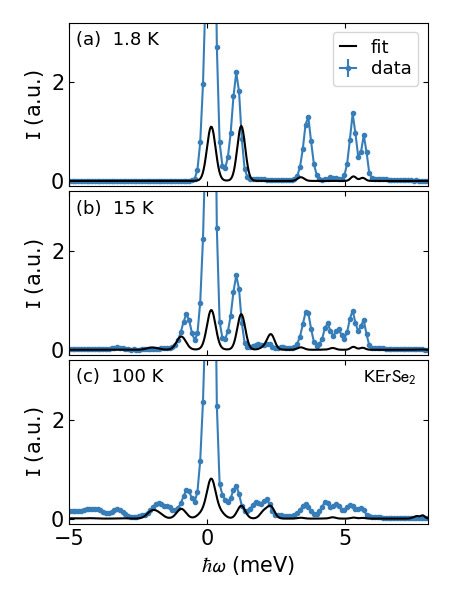

In [10]:
# Try overplotting initial simulation just for kicks
xxx = np.linspace(-10,30,1200)

sf = 1e2
fig2, ax = plt.subplots(3,1, figsize=(4.5,6), sharex=True, sharey=True)
for i,data in enumerate(alldata):
    ax[i].errorbar(data[0], data[1]*sf, data[2]*sf, marker='.', label='data', color=cpal1[1])
    ax[i].set_xlim(-5,8)
    ax[i].set_xlabel('$\\hbar \\omega$ (meV)')
    ax[i].set_ylabel('$\\rm I$ (a.u.)')

    ax[i].plot(xxx, sf*(FitCoefRes1['pref']*ErCoefFit1.normalizedNeutronSpectrum(Earray=xxx-xoffset,
                                                                                 Temp=datatemps[i], 
                                    ResFunc= lambda de: straightline(de, *width_popt),  gamma=0.01) + 0.0001),
              color='k', zorder=10, label='fit')
    
ax[0].set_ylim(-0.1,3.2)
ax[0].legend(loc=1, fontsize=13, handlelength=0.9, labelspacing=0.2)
    
subplotlabels = 'abcdefghijk'
for i, axx in enumerate(ax):
    axx.text(0.02,0.95, '('+subplotlabels[i]+')  '+str(datatemps[i])+' K', transform=axx.transAxes,
              verticalalignment='top', horizontalalignment='left', fontsize=13)
    
ax[-1].text(0.97,0.95, '$\\rm KErSe_2$', transform=ax[-1].transAxes,
              verticalalignment='top', horizontalalignment='right', fontsize=13)
    
plt.tight_layout()
fig2.subplots_adjust(hspace=0.03)

## Fit again, this time directly to the coefficients

In [11]:
# Build Hamiltonian, ignoring the negative stevens operators (because they shouldn't be allowed by symmetry).
ion = 'Er3+'
ionJ = cef.Jion[ion][2]

# Take final ligand values from above
Coefficients = []

Er_O = []
for n in range(2,8,2):
    for m in range(0,n+1,3):
        if   n == 6: i = 8 + m
        elif n == 4: i = 3 + m
        elif n == 2: i = m
        print(n,m, ErLigFit.B[i])
        Coefficients.append(ErLigFit.B[i])
        Er_O.append(  cef.StevensOp(ionJ,n,m)  )
        
Er = cef.CFLevels(Er_O, Coefficients)
Er.diagonalize()

######################


def err_global(CFLevelsObject, coeff, gamma, pref):
    """Global error to all functions passed to it, used for fitting"""
    # define new Hamiltonian
    newH = np.sum([a*b for a,b in zip(CFLevelsObject.O, coeff)], axis=0)
    CFLevelsObject.diagonalize(newH)

    # Compute error in eigenvalue
    try: erro=np.nansum((CFLevelsObject.eigenvalues.real - np.repeat(ObservedEnergies,2))**2)*1.5e5
    except TypeError:  erro = 0

    # Compute error in neutron spectrum
    for i,data in enumerate(fitdata):
        errspec = (pref* CFLevelsObject.normalizedNeutronSpectrum(Earray=data[0]*(1+datatemps[i]*1.9e-4)-xoffset,
                                                                  Temp=datatemps[i],
                                    ResFunc= lambda de: straightline(de, *width_popt), gamma=gamma) )+ 0.0001 -\
                data[1]
        if i == 0:
            erro += np.nansum((errspec/data[2])**2)*2  # Chisq with uncertainty
        else:
            erro += np.nansum((errspec/data[2])**2)


    #return err0 + constraint
    sys.stdout.write("\r err = "+str(erro)+'    ')
    sys.stdout.flush() # important for printing progress
    return erro

2 0 0.03489656625600587
4 0 -0.0002442487995743787
4 3 0.0064266226943161765
6 0 3.8334048292936454e-07
6 3 8.746072400424806e-06
6 6 4.234235351456976e-06


In [12]:
#************************************************************
# Fit to neutron data

##!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
##############################################################################################
FitCoefRes2 = Er.fitdata(chisqfunc = err_global,  fitargs = ['coeff','pref'], 
                         method = 'Powell',
            coeff = Coefficients, gamma=fittedLW, pref=FitCoefRes1['pref']*3)
##############################################################################################
##!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
print(FitCoefRes2['coeff'])

 err = 76379.69042462809         76379.69042462809
 err = 2627253.329286315    2627253.329286315
Initial err = 2627253.329286315 	Final err = 76379.69042462809
[-6.02718009e-03 -4.55065679e-04  1.18049789e-02  3.10570644e-06
  2.34960926e-05  1.09687166e-05]


#### Fit again
but we kick the fit out of the local minimum by multiplying the fitted prefactor by 10

In [13]:
#************************************************************
# Fit to neutron data

##!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
##############################################################################################
FitCoefRes3 = Er.fitdata(chisqfunc = err_global,  fitargs = ['coeff','pref'], 
                         method = 'Nelder-Mead',
            coeff = FitCoefRes2['coeff'], gamma=fittedLW, pref=FitCoefRes2['pref']*10)
##############################################################################################
##!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
print(FitCoefRes3['coeff'])

 err = 54775.25023608965     54775.25023608965
 err = 105149517.94282305    105149517.94282305
Initial err = 105149517.94282305 	Final err = 54775.25023608965
[-2.03178438e-02 -4.47842328e-04  1.32566635e-02  3.21225081e-06
  1.03482493e-05  2.51744971e-05]


In [14]:
#************************************************************
# Fit to neutron data

##!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
##############################################################################################
FitCoefRes4 = Er.fitdata(chisqfunc = err_global,  fitargs = ['coeff','pref'], 
                         method = 'Powell',
            coeff = FitCoefRes3['coeff'], gamma=fittedLW, pref=FitCoefRes3['pref']*10)
##############################################################################################
##!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

 err = 143026.2612486912         143026.2612486912
 err = 105032965.83542453    105032965.83542453
Initial err = 105032965.83542453 	Final err = 143026.2612486912


In [15]:
#************************************************************
# Fit to neutron data

##!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
##############################################################################################
FitCoefRes5 = Er.fitdata(chisqfunc = err_global,  fitargs = ['coeff','pref'], 
                         method = 'Powell',
            coeff = FitCoefRes4['coeff'], gamma=fittedLW, pref=FitCoefRes4['pref']*1)
##############################################################################################
##!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
print(FitCoefRes5)

 err = 38057.38606820631         38057.38606820631
 err = 143026.2612486912    143026.2612486912
Initial err = 143026.2612486912 	Final err = 38057.38606820631
{'coeff': array([ 2.41561662e-02, -4.84560947e-04,  1.27900144e-02,  1.16133685e-06,
        4.64379881e-05,  2.16952203e-05]), 'pref': array([0.00054798]), 'Chisq': 38057.38606820631}


In [16]:
print(FitCoefRes5)

### These are the final fitted coefficients
# {'coeff': array([-2.73322253e-02, -4.35224074e-04,  1.37335157e-02,  3.21714473e-06,
#         5.07123556e-06,  3.00061524e-05]), 'pref': array([0.00060911]), 'Chisq': 111106.44212124155}

# {'coeff': array([ 2.38455865e-02, -4.75880046e-04,  1.26817970e-02,  1.09941538e-06,
#         4.51382813e-05,  2.20364127e-05]), 'pref': array([0.00053987]), 'Chisq': 50599.66054007455}

ErCoefFit1 = cef.CFLevels(Er_O, FitCoefRes5['coeff'])
ErCoefFit1.diagonalize()
ErCoefFit1.printEigenvectors()
ErCoefFit1.gsExpectation()

{'coeff': array([ 2.41561662e-02, -4.84560947e-04,  1.27900144e-02,  1.16133685e-06,
        4.64379881e-05,  2.16952203e-05]), 'pref': array([0.00054798]), 'Chisq': 38057.38606820631}

 Eigenvalues 	 Eigenvectors
		-----------------------------------------------------------------------------------------------------------------------
0.00000 	|  [ 0.     0.     0.    -0.014  0.     0.    -0.232  0.     0.    -0.469
  0.     0.     0.519  0.     0.    -0.676]  |
0.00000 	|  [ 0.676  0.     0.     0.519  0.     0.     0.469  0.     0.    -0.232
  0.     0.     0.014  0.     0.     0.   ]  |
0.89714 	|  [ 0.    -0.291  0.004  0.    -0.444  0.019  0.    -0.788  0.05   0.
  0.298 -0.028  0.    -0.067  0.019 -0.   ]  |
0.89714 	|  [ 0.    -0.019 -0.067  0.    -0.028 -0.298  0.    -0.05  -0.788  0.
  0.019  0.444  0.    -0.004 -0.291  0.   ]  |
3.47994 	|  [ 0.     0.317 -0.241  0.     0.255 -0.327  0.    -0.433  0.362  0.
 -0.391  0.213  0.     0.288 -0.265  0.   ]  |
3.47994 	|  [ 0.     0.

<IPython.core.display.Javascript object>


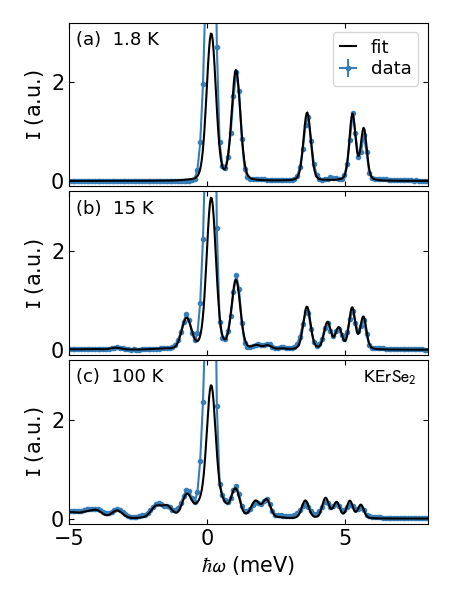

In [17]:
# Try overplotting initial simulation just for kicks
xxx = np.linspace(-10,30,1200)

sf = 1e2
fig2, ax = plt.subplots(3,1, figsize=(4.5,6), sharex=True, sharey=True)
for i,data in enumerate(alldata):
    ax[i].errorbar(data[0], data[1]*sf, data[2]*sf, marker='.', label='data', color=cpal1[1])
    ax[i].set_xlim(-5,8)
    ax[i].set_xlabel('$\\hbar \\omega$ (meV)')
    ax[i].set_ylabel('$\\rm I$ (a.u.)')

    ax[i].plot(xxx, sf*(FitCoefRes3['pref']*ErCoefFit1.normalizedNeutronSpectrum(
        Earray=xxx*(1+datatemps[i]*1.9e-4)-xoffset, Temp=datatemps[i],
                                    ResFunc=lambda de: straightline(de, *width_popt), gamma=fittedLW) + 0.0001),
              color='k', zorder=10, label='fit')
    
ax[0].set_ylim(-0.1,3.2)
ax[0].legend(loc=1, fontsize=13, handlelength=0.9, labelspacing=0.2)
    
subplotlabels = 'abcdefghijk'
for i, axx in enumerate(ax):
    axx.text(0.02,0.95, '('+subplotlabels[i]+')  '+str(datatemps[i])+' K', transform=axx.transAxes,
              verticalalignment='top', horizontalalignment='left', fontsize=13)
    
ax[-1].text(0.97,0.95, '$\\rm KErSe_2$', transform=ax[-1].transAxes,
              verticalalignment='top', horizontalalignment='right', fontsize=13)
    
plt.tight_layout()
fig2.subplots_adjust(hspace=0.03)

savedir = '/home/1o1/Documents/KErSe2/figures/'
# plt.savefig(savedir+'KES_CEF_fit.pdf')

## Fit one more time, but this time allow gamma to vary with temperature, and also fit the x offset.

In [18]:
lastfitcoeff = np.array([ 2.38455865e-02, -4.75880046e-04,  1.26817970e-02,  1.09941538e-06,
        4.51382813e-05,  2.20364127e-05])
lastfitpref = 0.00053987

In [19]:
def err_global_final(CFLevelsObject, coeff, gammas, xoff, pref):
    """Global error to all functions passed to it, used for fitting"""
    # define new Hamiltonian
    newH = np.sum([a*b for a,b in zip(CFLevelsObject.O, coeff)], axis=0)
    CFLevelsObject.diagonalize(newH)

    # Compute error in eigenvalue
#     try: erro=np.nansum((CFLevelsObject.eigenvalues.real - np.repeat(ObservedEnergies,2))**2)*1.5e5
# #     try: erro=np.nansum((CFLevelsObject.eigenvalues.real - ObsEigenvals)**2)*4.5e5   
#         #best convergence for initial fit which didn't work
#     except TypeError:  erro = 0
    erro = 0

    # Compute error in neutron spectrum
    for i,data in enumerate(fitdata):
        errspec = (pref* CFLevelsObject.normalizedNeutronSpectrum(Earray=data[0]-xoff,
                                                                  Temp=datatemps[i],
                                    ResFunc= lambda de: straightline(de, *width_popt), gamma=gammas[i]) )+ 0.0001 -\
                        data[1]
#         errspec = (pref* CFLevelsObject.normalizedNeutronSpectrum(Earray=data[0]*(1+datatemps[i]*1.9e-4)-xoff,
#                                                                   Temp=datatemps[i],
#                                     ResFunc= lambda de: straightline(de, *width_popt), gamma=gammas[i]) )+ 0.0001 -\
                
        erro += np.nansum((errspec/data[2])**2)


    sys.stdout.write("\r err = "+str(erro)+'    ')
    sys.stdout.flush() # important for printing progress
    return erro

In [20]:
#************************************************************
# Fit to neutron data

##!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
##############################################################################################
FitCoefRes6 = Er.fitdata(chisqfunc = err_global_final,  fitargs = ['coeff','pref','gammas','xoff'], 
                         method = 'Nelder-Mead',
            coeff = lastfitcoeff, gammas=[fittedLW,fittedLW,fittedLW*1.5], pref=lastfitpref, xoff = 0.05)
##############################################################################################
##!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

 err = 26270.23005600515     26270.23005600515
 err = 315517.0391314187    315517.0391314187
Initial err = 315517.0391314187 	Final err = 26270.23005600515


In [21]:
print(FitCoefRes6)

# {'coeff': array([-3.61822868e-02, -4.21915565e-04,  1.43670939e-02,  3.27762754e-06,
#        -7.03340586e-07,  3.46073263e-05]), 'pref': array([0.00063378]), 
# 'gammas': array([0.06014774, 0.05426838, 0.15472294]), 'xoff': array([0.14987771]), 'Chisq': 47081.8967150292}

######################### 11/15/19 values 

# {'coeff': array([ 2.46014556e-02, -4.81705277e-04,  1.27863494e-02,  1.10191489e-06,
#         4.62142987e-05,  2.18635987e-05]), 'pref': array([0.00055663]), 
#  'gammas': array([0.06871221, 0.06988419, 0.15774453]), 'xoff': array([0.14322789]), 'Chisq': 21226.642843757196}

ErCoefFit2 = cef.CFLevels(Er_O, FitCoefRes6['coeff'])
ErCoefFit2.diagonalize()
ErCoefFit2.printEigenvectors()
ErCoefFit2.gsExpectation()

{'coeff': array([ 2.32575380e-02, -4.73413709e-04,  1.26946732e-02,  1.08102667e-06,
        4.47713362e-05,  2.23404722e-05]), 'pref': array([0.00054856]), 'gammas': array([0.06884367, 0.07168863, 0.16511265]), 'xoff': array([0.14361942]), 'Chisq': 26270.23005600515}

 Eigenvalues 	 Eigenvectors
		-----------------------------------------------------------------------------------------------------------------------
0.00000 	|  [ 0.674  0.     0.     0.521  0.     0.     0.466  0.     0.    -0.238
  0.     0.     0.016  0.     0.     0.   ]  |
0.00000 	|  [ 0.     0.     0.    -0.016  0.     0.    -0.238  0.     0.    -0.466
  0.     0.     0.521  0.     0.    -0.674]  |
0.90341 	|  [ 0.    -0.069  0.077  0.    -0.106  0.313  0.    -0.175  0.744  0.
  0.074 -0.45   0.    -0.018  0.295  0.   ]  |
0.90341 	|  [ 0.    -0.295 -0.018  0.    -0.45  -0.074  0.    -0.744 -0.175  0.
  0.313  0.106  0.    -0.077 -0.069  0.   ]  |
3.47741 	|  [ 0.     0.021 -0.385  0.     0.016 -0.509  0.    -0.0

<IPython.core.display.Javascript object>


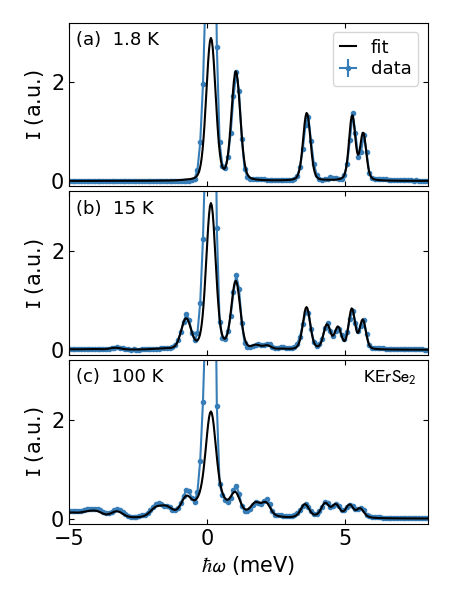

In [22]:
xxx = np.linspace(-10,30,1200)

sf = 1e2
fig2, ax = plt.subplots(3,1, figsize=(4.5,6), sharex=True, sharey=True)
for i,data in enumerate(alldata):
    ax[i].errorbar(data[0], data[1]*sf, data[2]*sf, marker='.', label='data', color=cpal1[1])
    ax[i].set_xlim(-5,8)
    ax[i].set_xlabel('$\\hbar \\omega$ (meV)')
    ax[i].set_ylabel('$\\rm I$ (a.u.)')

    ax[i].plot(xxx, sf*(FitCoefRes6['pref']*ErCoefFit2.normalizedNeutronSpectrum(
                                    Earray=xxx*(1+datatemps[i]*1.9e-4)-FitCoefRes6['xoff'],
                                    Temp=datatemps[i],
                                    ResFunc=lambda de: straightline(de,*width_popt),  
                                    gamma=FitCoefRes6['gammas'][i]) + 0.0001),
              color='k', zorder=10, label='fit')
    
ax[0].set_ylim(-0.1,3.2)
ax[0].legend(loc=1, fontsize=13, handlelength=0.9, labelspacing=0.2)
    
subplotlabels = 'abcdefghijk'
for i, axx in enumerate(ax):
    axx.text(0.02,0.95, '('+subplotlabels[i]+')  '+str(datatemps[i])+' K', transform=axx.transAxes,
              verticalalignment='top', horizontalalignment='left', fontsize=13)
    
ax[-1].text(0.97,0.95, '$\\rm KErSe_2$', transform=ax[-1].transAxes,
              verticalalignment='top', horizontalalignment='right', fontsize=13)
    
plt.tight_layout()
fig2.subplots_adjust(hspace=0.03)

## Thus, the initial fit is completed. It looks pretty good. The next step in the fit is KES_CEF_fit2.ipynb, where we compare this fit to the result from $\rm CsErSe_2$